# Energy data analysis

## Imports

In [5]:
import pandas as pd
import numpy as np

import datetime as dt
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

# Importing [Energy data](https://github.com/LuisM78/Appliances-energy-prediction-data)

In [3]:
Energy_data = pd.read_csv("port2data/energydata_complete.csv")
Energy_data['date'] = pd.to_datetime(Energy_data['date'])
Energy_data.index = Energy_data['date']
Energy_data.head(5)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


## Variables

**Here are definitions of the important fields in the data**:
* date time year-month-day hour:minute:second 
* Appliances, energy use in Wh
* lights, energy use of light fixtures in the house in Wh
* T1, Temperature in kitchen area, in Celsius
* RH_1, Humidity in kitchen area, in %
* T2, Temperature in living room area, in Celsius
* RH_2, Humidity in living room area, in %
* T3, Temperature in laundry room area
* RH_3, Humidity in laundry room area, in %
* T4, Temperature in office room, in Celsius
* RH_4, Humidity in office room, in %
* T5, Temperature in bathroom, in Celsius
* RH_5, Humidity in bathroom, in %
* T6, Temperature outside the building (north side), in Celsius
* RH_6, Humidity outside the building (north side), in %
* T7, Temperature in ironing room , in Celsius
* RH_7, Humidity in ironing room, in %
* T8, Temperature in teenager room 2, in Celsius
* RH_8, Humidity in teenager room 2, in %
* T9, Temperature in parents room, in Celsius
* RH_9, Humidity in parents room, in %
* To, Temperature outside (from Chièvres weather station), in Celsius
* Pressure (from Chièvres weather station), in mm Hg
* RH_out, Humidity outside (from Chièvres weather station), in %
* Windspeed (from Chièvres weather station), in m/s
* Visibility (from Chièvres weather station), in km
* Tdewpoint (from Chièvres weather station), °C
* rv1, Random variable 1, nondimensional
* rv2, Rnadom variable 2, nondimensional

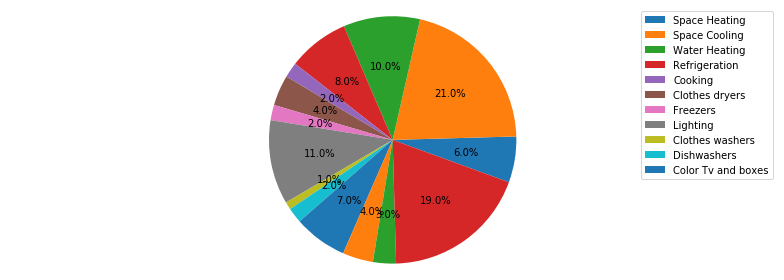

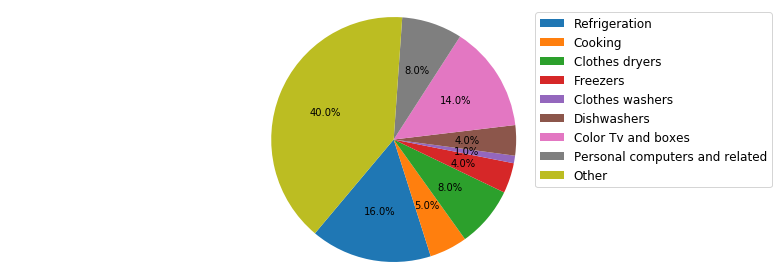

In [5]:
#1st pie chart for electricity consumption of each appliances 
labels_one= ['Space Heating', 'Space Cooling', 'Water Heating', 'Refrigeration', 'Cooking', 'Clothes dryers', 'Freezers',
         'Lighting', 'Clothes washers', 'Dishwashers', 'Color Tv and boxes']
sizes_label_1 = [6, 21, 10, 8, 2, 4, 2, 11, 1, 2, 7,4,3,19]

fig1, ax1 = plt.subplots(figsize=(11,4))


patches, texts, autotexts = ax1.pie(sizes_label_1,autopct='%1.1f%%', startangle=340,)
plt.legend(patches, labels_one, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

#2nd pie chart for electricity consumption of each spacing area  
labels_two =['Refrigeration', 'Cooking', 'Clothes dryers', 'Freezers', 'Clothes washers', 'Dishwashers',
             'Color Tv and boxes', 'Personal computers and related', 'Other']
sizes_label_2 = [16, 5, 8, 4, 1, 4, 14, 8, 40]

fig2, ax2 = plt.subplots(figsize=(11,4))


patches, texts, autotexts = ax2.pie(sizes_label_2,autopct='%1.1f%%', startangle=230,)
plt.legend(patches, labels_two, loc="best",prop={'size': 12})
ax2.axis('equal')  
plt.tight_layout()
plt.show()

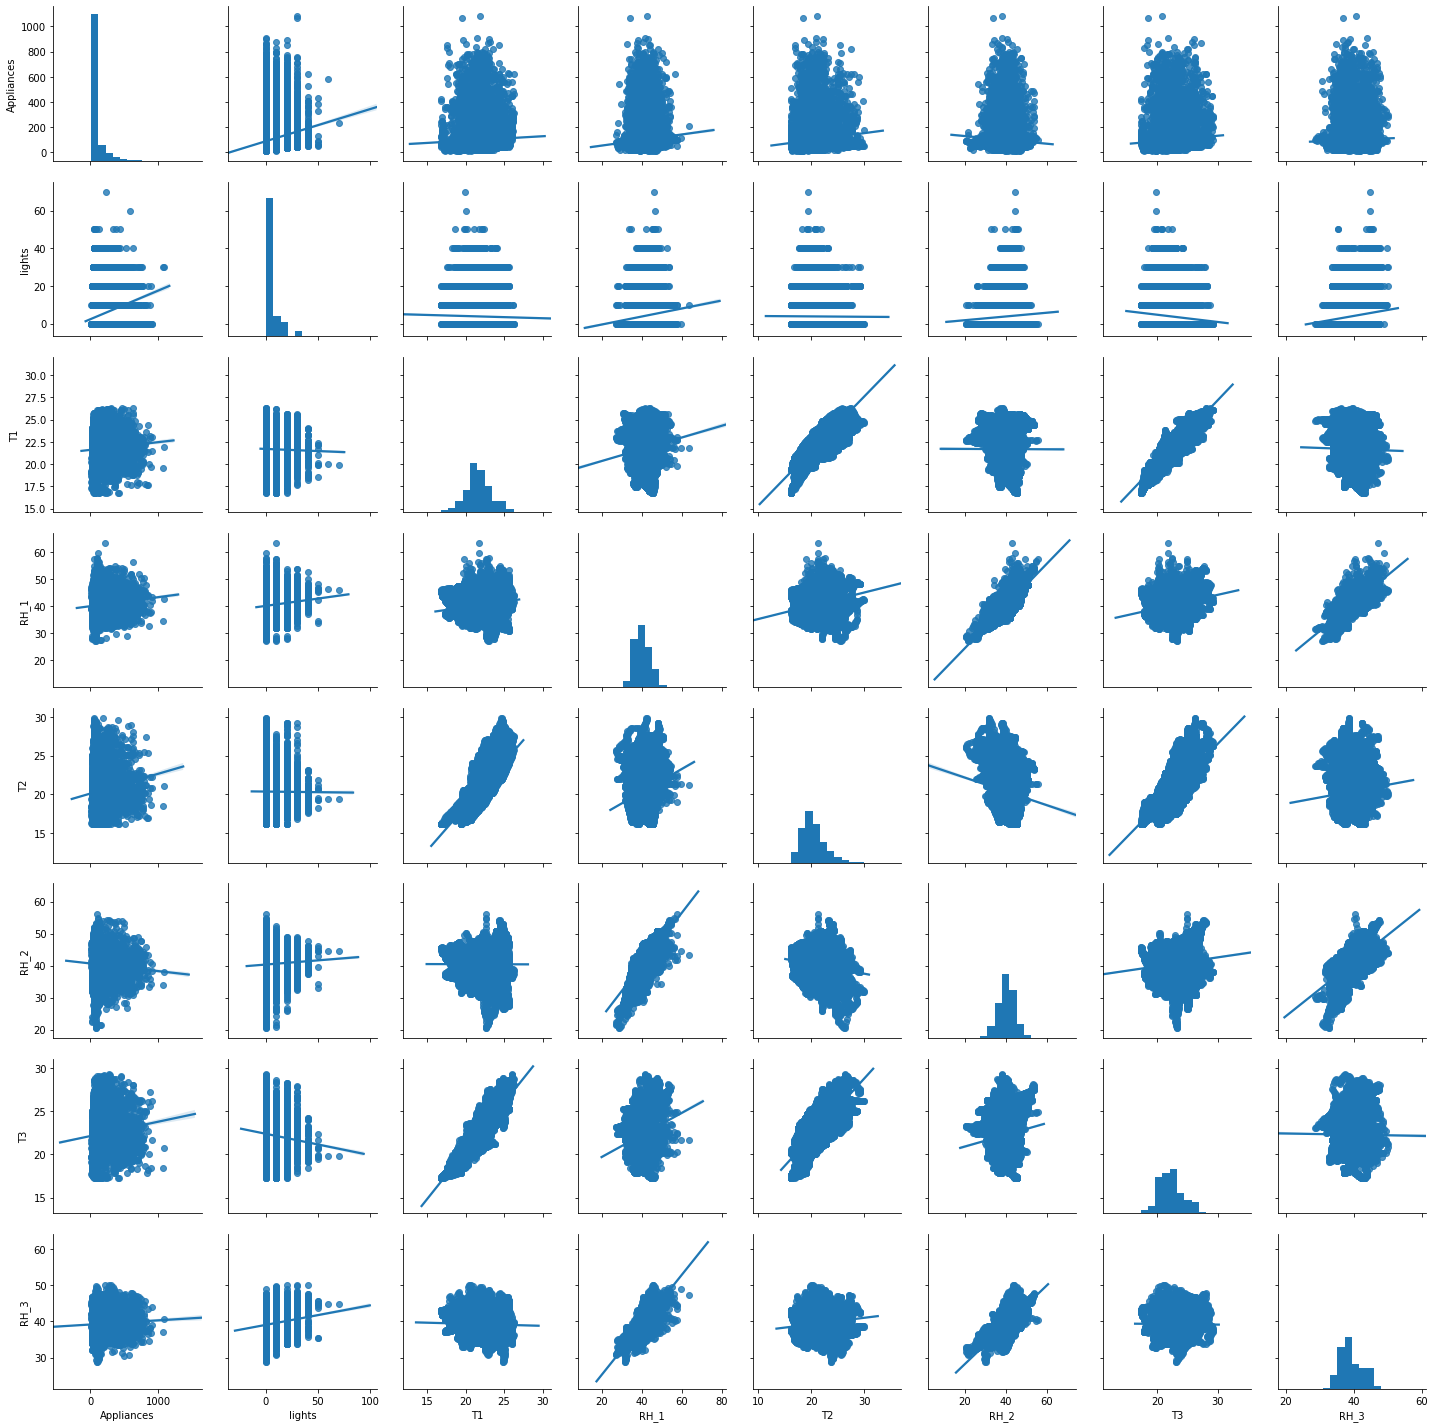

In [240]:
#pair plots for Relationship between the energy consumption of appliances with: 
#lights, T1, RH1, T2, RH2, T3, RH3. T1 and RH1 correspond to the kitchen conditions; T2 and 
#RH2 correspond to the living room conditions
multiplots = sns.pairplot(Energy_data[['Appliances','lights','T1','RH_1','T2','RH_2','T3','RH_3']], 
                          kind="reg", diag_kind='hist')

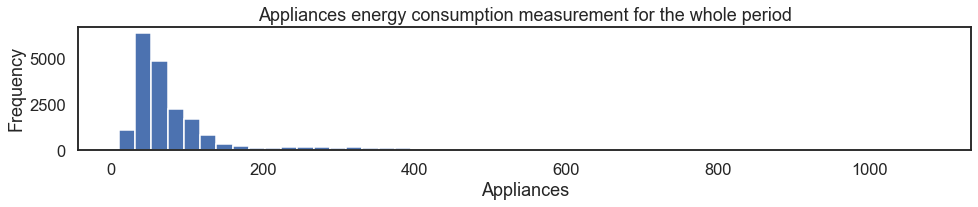

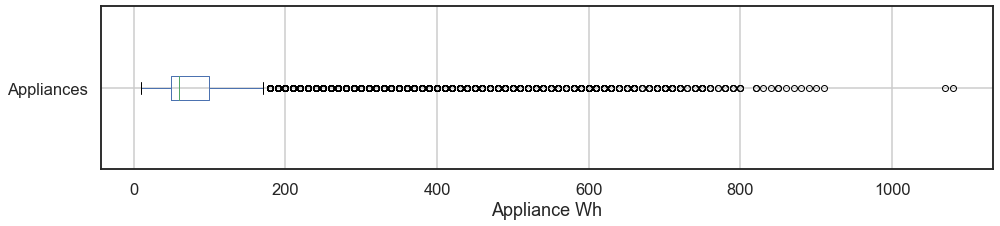

In [139]:
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(2,1,1)
g = ax.hist(Energy_data['Appliances'], bins =50)
plt.title('Appliances energy consumption measurement for the whole period')
plt.xlabel('Appliances')
plt.ylabel('Frequency')
plt.show()

Energy_data.boxplot(column='Appliances', vert=False, figsize=(16,3))
plt.xlabel("Appliance Wh")
plt.show()

## Heatmap

C:\Users\Taiga\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\Taiga\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


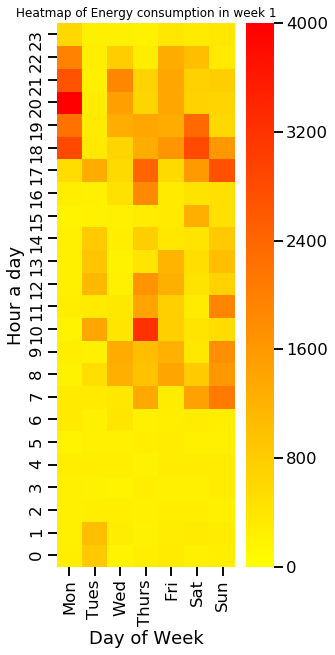

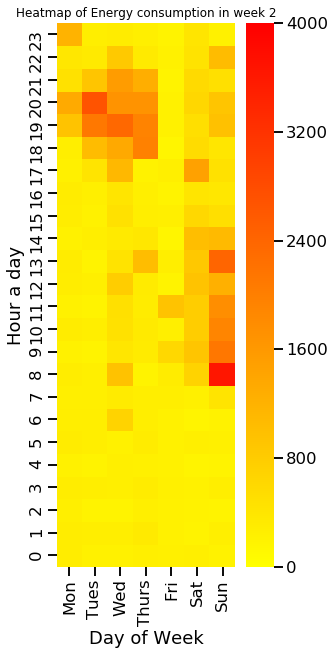

In [21]:
from datetime import timedelta
d = timedelta(microseconds=-1)

#Create new date time as start_time_datetime and add weekday name and hour in them
Energy_data['start_time_datetime'] = pd.to_datetime(Energy_data['date'])
Energy_data['start_time_day_name'] = Energy_data['start_time_datetime'].dt.weekday_name
Energy_data['start_time_hour'] = Energy_data['start_time_datetime'].dt.hour

#Time period 
days = timedelta(days=7)
first_week = pd.Timestamp(2016,1,19)
second_week = first_week + days
third_week = second_week +days

week_1 = Energy_data[Energy_data['start_time_datetime'] < first_week]
week2 = Energy_data[first_week < Energy_data['start_time_datetime']] 
week_2 = week2[Energy_data['start_time_datetime'] < second_week]
week3 = Energy_data[second_week > Energy_data['start_time_datetime']] 
week_3 = week3[Energy_data['start_time_datetime'] < third_week]
# fisrt week
app_used1= pd.pivot_table(week_1[['start_time_day_name', 'start_time_hour', 'Appliances']], 
                                    index=['start_time_day_name', 'start_time_hour'], aggfunc='sum')
app_amount_used_hour1 = app_used1.unstack(level=0)
app_amount_used_hour1 = app_amount_used_hour1.reindex(labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 
                                                        'Saturday', 'Sunday'], axis=1, level=1)
# second week
app_used2= pd.pivot_table(week_2[['start_time_day_name', 'start_time_hour', 'Appliances']], 
                                    index=['start_time_day_name', 'start_time_hour'], aggfunc='sum')
app_amount_used_hour2 = app_used2.unstack(level=0)
app_amount_used_hour2 = app_amount_used_hour2.reindex(labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 
                                                        'Saturday', 'Sunday'], axis=1, level=1)

#functions for hours and day
hours = []
for hour in range(24):
    hours.append(hour)
    
day_short_names = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']


#Plotting heatamp
sns.set_context("talk")
f, ax = plt.subplots(figsize=(4, 10))
ax = sns.heatmap(app_amount_used_hour1, annot=False, linewidths=0, ax=ax,cmap="autumn_r", vmin=0, vmax=4000,
                 cbar=True, xticklabels=day_short_names, yticklabels=hours)

ax.axes.set_title("Heatmap of Energy consumption in week 1", fontsize=12, y=1.01)
ax.set(xlabel='Day of Week', ylabel='Hour a day');
ax.invert_yaxis()

sns.set_context("talk")
f, ax = plt.subplots(figsize=(4, 10))
ax = sns.heatmap(app_amount_used_hour2, annot=False, linewidths=0, ax=ax,cmap="autumn_r", vmin=0, vmax=4000,
                 cbar=True, xticklabels=day_short_names, yticklabels=hours)

ax.axes.set_title("Heatmap of Energy consumption in week 2", fontsize=12, y=1.01)
ax.set(xlabel='Day of Week', ylabel='Hour a day');
ax.invert_yaxis()

## Linear Regression

In [141]:
train = pd.read_csv("port2data/training.csv")
train.drop(train.columns[0], axis=1, inplace=True)

feature_col = np.array(['lights', 'T1', 'RH_1','T2','RH_2','T3','RH_3','T4','RH_4','T5','RH_5','T6','RH_6','T7','RH_7',
                         'T8','RH_8','T9', 'RH_9','T_out','Press_mm_hg','RH_out','Windspeed','Visibility','Tdewpoint',
                         'rv1','rv2','NSM'])
X=train[feature_col]
y = train.Appliances

reg = LinearRegression()
model = reg.fit(X, y)
y_pred = reg.predict(X)

print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))
print("R^2:", r2_score(y, y_pred))


RMSE: 93.57143468503801
R^2: 0.17188056846730493


## Recursive Feature Elimination

In [142]:
# Using the same data as before, use an RFE to find the top 5 predictors
estimator = LinearRegression()
selector = RFE(estimator, 5)
selector = selector.fit(X, y)

# Test the model
support = selector.get_support()
predicted = selector.predict(X)
print("RMSE:", np.sqrt(mean_squared_error(y, predicted)))
print("R^2:", r2_score(y, predicted), "\n")



RMSE: 97.81304459206733
R^2: 0.09510132328650178 



## Residual plot for the linear regression model

In [143]:
selector = RFE(estimator, 28)  
selector = selector.fit(X, y)

supp = selector.get_support()
print("Selected features:", feature_col[supp])
print("Coeffs:", selector.estimator_.coef_)

# testing the model
predicted = selector.predict(X)
print("MSE:", mean_squared_error(y, predicted))
print("R^2:", r2_score(y, predicted))

Selected features: ['lights' 'T1' 'RH_1' 'T2' 'RH_2' 'T3' 'RH_3' 'T4' 'RH_4' 'T5' 'RH_5' 'T6'
 'RH_6' 'T7' 'RH_7' 'T8' 'RH_8' 'T9' 'RH_9' 'T_out' 'Press_mm_hg' 'RH_out'
 'Windspeed' 'Visibility' 'Tdewpoint' 'rv1' 'rv2' 'NSM']
Coeffs: [ 1.86660516e+00 -4.14497987e+00  1.44790183e+01 -1.78426597e+01
 -1.37115412e+01  2.76620233e+01  5.34759535e+00 -2.51528298e+00
 -7.94526199e-01 -1.50241017e+00  9.21698362e-02  7.37898919e+00
  3.26591065e-01  2.00333400e+00 -1.74131349e+00  8.10390686e+00
 -3.64205959e+00 -1.33516314e+01 -3.25454078e-01 -1.01102847e+01
  1.86447658e-01 -9.03894716e-01  1.82733594e+00  1.33901648e-01
  4.19325863e+00 -2.45927477e-02 -2.45927477e-02  2.94814485e-04]
MSE: 8755.613389016335
R^2: 0.17188056846730493


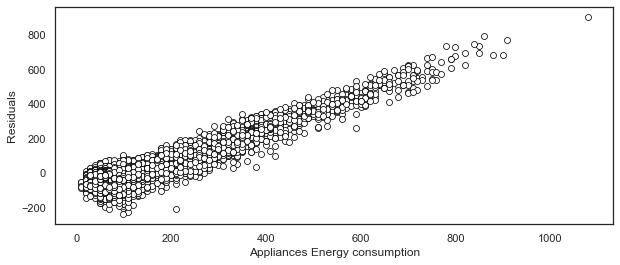

In [150]:
#Plotting it
sns.set(rc={'figure.figsize':(10,4)},style='white', font_scale=1)
y_hat = reg.predict(X)
y = train['Appliances']
resi = y - y_hat
ax = sns.scatterplot(y,resi, color='white', edgecolor='black')
ax.set(xlabel='Appliances Energy consumption', ylabel='Residuals');

In [ ]:
#NSM
def secs_converter (here):
    time = str(here[0].time())
    return sum(x * int(t) for x, t in zip([3600, 60, 1], time.split(":")))
Energy_data['NSM'] = Energy_data.apply(secs_converter , axis=1)
del Energy_data['date']

Energy_data.head(4)


#Diagram for that ^
fig = pd.DataFrame(Energy_data, columns = ['date', 'Appliances'])
fig.plot().get_legend().remove()
plt.title("Appliances energy consumption measurement for the whole period")
plt.ylabel("Appliance Wh")
plt.xlabel('Time (1 week)')
plt.show()

fig = fig['1/11/2016':'1/18/2016']

fig.plot().get_legend().remove()
plt.title('Appliances energy consumption measurement (one week)')
plt.ylabel('Appliance Wh')
plt.xlabel('Time (1 week)')
plt.show()